<a href="https://colab.research.google.com/github/spdkh/Machine-Learning/blob/master/ML_Project__Parisa_Daj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project

## Import Libraries

In [1]:
import glob
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

from gensim.models import Word2Vec
import gensim

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/data/Machine_Learning/'


In [4]:
data = dict()
words_counter = dict()
data_word2vec = dict()
for i, file in enumerate(glob.glob(data_dir + '*.txt')):
    type_ = file.split('/')[-1].replace('.txt', '')
    with open(file) as f:
        data[type_] = f.readlines()
    # words_counter[type_] = collections.Counter([word for sentence in data[type_] for word in sentence.split()])
    data_word2vec[type_] = Word2Vec(sentences=data[type_],
                 window=5, min_count=1, workers=4)
print('Dataset Loaded')
print(data.keys())
# print(words_counter)


Dataset Loaded
dict_keys(['test', 'trainlabels', 'testlabels', 'validation', 'validationlabels', 'train'])


In [5]:
for sample_i in range(2):
    print('Test Line {}:  {}'.format(sample_i + 1, data['test'][sample_i]))
    print('Test Label {}:  {}'.format(sample_i + 1, data['testlabels'][sample_i]))
    
    print('Train Line {}:  {}'.format(sample_i + 1, data['train'][sample_i]))
    print('Train Label {}:  {}'.format(sample_i + 1, data['trainlabels'][sample_i]))
print(np.shape(data['train']))
print(np.shape(data['validation']))
print(np.shape(data['test']))

Test Line 1:  A recent stay at the James Hotel-Chicago, revealed the the recent updating at this hotel was a facelift only. Although the rooms and public areas look nice, the hotel still needs serious work. Our first room was not clean when we arrived and this non-smoking room had a serious odor of cigarette smoke. We asked for a new room which was clean and odor free. We had to involve the Manager before our request was granted. The new room was better at first glance, but was severely lacking. We could not get the temperature properly regulated. The room was always either too hot or too cold for our two night stay. In a hotel commanding the rates of the James, we expect the room temperature to be a comfort which is taken for granted, not something which is a constant battle. Our mattress was horribly uncomfortable. When the rooms were updated, the James skipped new mattresses. Ours was worn to the point of having indentations you can't get out of--when you lie down, you sort of sink 

In [6]:
data_word2vec['train'][data['train'][10][10]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.07001857,  0.06334195, -0.047704  , -0.02834628,  0.22741158,
        0.38218677, -0.23228121,  0.25482547,  0.3270088 , -0.06648161,
        0.14152896, -0.05429206, -0.0302817 , -0.06182584,  0.27059448,
        0.07733041,  0.2718061 ,  0.06274204,  0.0560449 ,  0.38012323,
       -0.2934552 , -0.11088447,  0.02600452, -0.24957143, -0.30823678,
       -0.2572764 , -0.01021157,  0.0257428 ,  0.02062578, -0.15266715,
        0.04126903, -0.30923378, -0.3536046 , -0.11325978,  0.04909535,
       -0.04070758, -0.24135527, -0.01053654,  0.09837872,  0.06689546,
       -0.10657115, -0.35553476, -0.00827671, -0.02830714,  0.24863341,
       -0.01179694, -0.4386969 ,  0.2743556 ,  0.282551  , -0.40959713,
        0.4048206 , -0.32458997, -0.06840073,  0.13569383,  0.03801304,
       -0.24331643,  0.02856317, -0.07448559,  0.5575828 ,  0.4670614 ,
        0.18737015,  0.01975152,  0.09284528,  0.46198687, -0.01155018,
       -0.09363211,  0.00335689, -0.03775613, -0.05846178, -0.35

In [13]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""
    def __init__(self, path):
        self.path = path
    def __iter__(self):
        corpus_path = datapath(self.path)
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [18]:
import gensim.models

data = dict()
words_counter = dict()
data_word2vec = dict()

for i, file in enumerate(glob.glob(data_dir + '*.txt')):
    print(file)
    type_ = file.split('/')[-1].replace('.txt', '')
    data[type_] = MyCorpus(file)
    data_word2vec[type_] = gensim.models.Word2Vec(sentences=data[type_])

print(data.keys())


/content/drive/MyDrive/data/Machine_Learning/test.txt
/content/drive/MyDrive/data/Machine_Learning/trainlabels.txt


RuntimeError: ignored

In [17]:
print(data['test'])

TypeError: ignored

In [7]:
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(lee_train_file))
test_corpus = list(read_corpus(lee_test_file, tokens_only=True))

NameError: ignored

In [8]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50,
                                      min_count=2,
                                      epochs=40)
model.build_vocab(data['train'])

AttributeError: ignored

In [ ]:
def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    x_tk = Tokenizer(char_level = False)
    x_tk.fit_on_texts(x)
    return x_tk.texts_to_sequences(x), x_tk

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))


{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


In [ ]:
def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """

    if length is None:
        length = max([len(sentence) for sentence in x])
    return pad_sequences(x, maxlen = length, padding = 'post')

#tests.test_pad(pad)

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))



Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


In [ ]:
def preprocess(x):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess, tk = tokenize(x)

    preprocess = pad(preprocess)

    return preprocess, tk

preproc_train, train_tokenizer =\
    preprocess(data['train'])
    
train_sequence_length = preproc_train.shape[1]
train_size = len(preproc_train.word_index)

print('Data Preprocessed')
print("Max train sentence length:", train_sequence_length)
print("train vocabulary size:", train_size)


AttributeError: ignored

# Boosting
minimizing the bias


Number of estimators: 1 

Errors: [0.33333333]
Weights: [1.38629436]
Score: [0.6666666666666666]
Cross validation score: 0.667


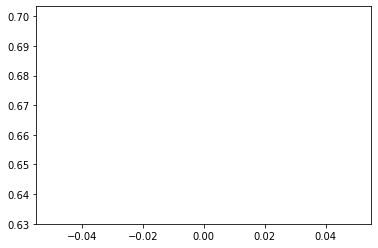


Number of estimators: 2 

Errors: [0.33333333 0.18      ]
Weights: [1.38629436 2.20949467]
Score: [0.6666666666666666, 0.66]
Cross validation score: 0.647


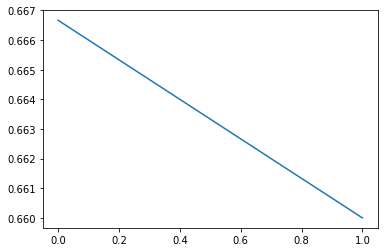


Number of estimators: 3 

Errors: [0.33333333 0.18       0.11412225]
Weights: [1.38629436 2.20949467 2.74245588]
Score: [0.6666666666666666, 0.66, 0.96]
Cross validation score: 0.953


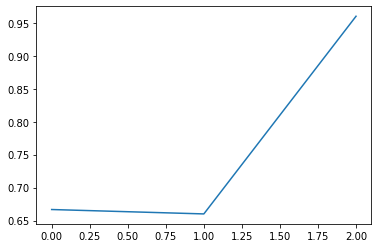


Number of estimators: 4 

Errors: [0.33333333 0.18       0.11412225 0.23700484]
Weights: [1.38629436 2.20949467 2.74245588 1.86231829]
Score: [0.6666666666666666, 0.66, 0.96, 0.9533333333333334]
Cross validation score: 0.94


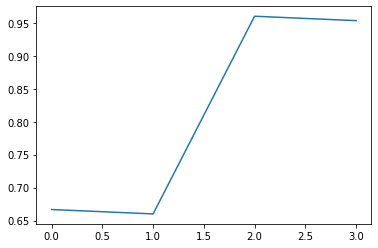


Number of estimators: 5 

Errors: [0.33333333 0.18       0.11412225 0.23700484 0.16042775]
Weights: [1.38629436 2.20949467 2.74245588 1.86231829 2.34819602]
Score: [0.6666666666666666, 0.66, 0.96, 0.9533333333333334, 0.96]
Cross validation score: 0.947


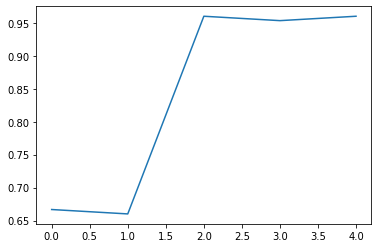


Number of estimators: 6 

Errors: [0.33333333 0.18       0.11412225 0.23700484 0.16042775 0.14913686]
Weights: [1.38629436 2.20949467 2.74245588 1.86231829 2.34819602 2.43453408]
Score: [0.6666666666666666, 0.66, 0.96, 0.9533333333333334, 0.96, 0.9666666666666667]
Cross validation score: 0.947


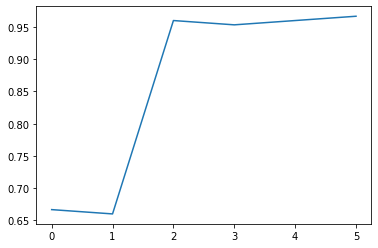


Number of estimators: 7 

Errors: [0.33333333 0.18       0.11412225 0.23700484 0.16042775 0.14913686
 0.29556782]
Weights: [1.38629436 2.20949467 2.74245588 1.86231829 2.34819602 2.43453408
 1.56164094]
Score: [0.6666666666666666, 0.66, 0.96, 0.9533333333333334, 0.96, 0.9666666666666667, 0.9733333333333334]
Cross validation score: 0.96


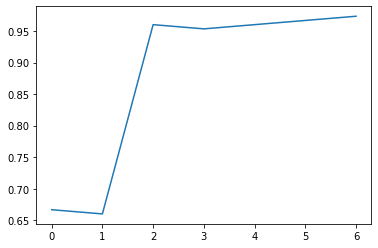


Number of estimators: 8 

Errors: [0.33333333 0.18       0.11412225 0.23700484 0.16042775 0.14913686
 0.29556782 0.18812451]
Weights: [1.38629436 2.20949467 2.74245588 1.86231829 2.34819602 2.43453408
 1.56164094 2.15539011]
Score: [0.6666666666666666, 0.66, 0.96, 0.9533333333333334, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667]
Cross validation score: 0.947


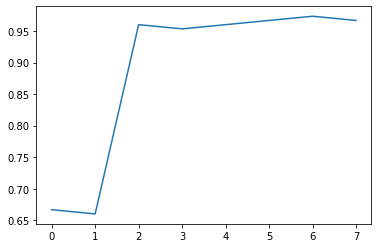


Number of estimators: 9 

Errors: [0.33333333 0.18       0.11412225 0.23700484 0.16042775 0.14913686
 0.29556782 0.18812451 0.24460464]
Weights: [1.38629436 2.20949467 2.74245588 1.86231829 2.34819602 2.43453408
 1.56164094 2.15539011 1.82074526]
Score: [0.6666666666666666, 0.66, 0.96, 0.9533333333333334, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334]
Cross validation score: 0.953


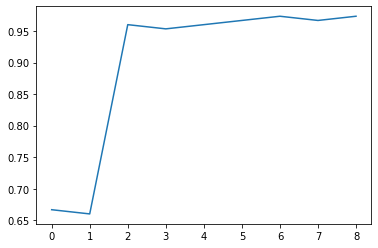


Number of estimators: 10 

Errors: [0.33333333 0.18       0.11412225 0.23700484 0.16042775 0.14913686
 0.29556782 0.18812451 0.24460464 0.29418002]
Weights: [1.38629436 2.20949467 2.74245588 1.86231829 2.34819602 2.43453408
 1.56164094 2.15539011 1.82074526 1.56831551]
Score: [0.6666666666666666, 0.66, 0.96, 0.9533333333333334, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667]
Cross validation score: 0.953


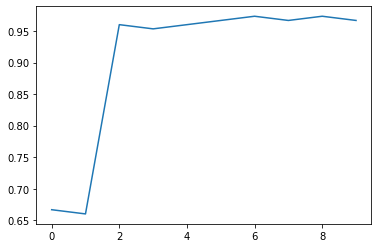

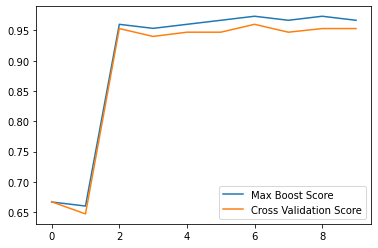

In [ ]:
last_score = []
val_score = []
for n in range(1, 11):
    print('\nNumber of estimators:', n, '\n')
    boost_clf =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                    n_estimators=n,algorithm="SAMME")
    boost_clf.fit(X,y)
    print('Errors:', boost_clf.estimator_errors_)
    print('Weights:', boost_clf.estimator_weights_)
    boost_S = list(boost_clf.staged_score(X,y))
    last_score.append(boost_S[-1])
    print('Score:', boost_S)
    boost_val_score = np.round(np.mean(cross_val_score(boost_clf, X, y, cv=5)), 3)
    val_score.append(boost_val_score)
    print('Cross validation score:', boost_val_score)
    plt.plot(boost_S)

    plt.show()
plt.plot(last_score, label='Max Boost Score')
plt.plot(val_score, label = 'Cross Validation Score')
plt.legend()

# Bagging
minimizing the variance

In [ ]:
ag_score = []
bag_val_score = []
for n in range(1, 11):
    print('\nNumber of estimators:', n, '\n')

    bag_clf =  BaggingClassifier(DecisionTreeClassifier(max_depth=1),
                                    n_estimators=n)
    bag_clf.fit(X,y)
    # o = bag_clf.predict(X)
    # print(np.shape(o[o == 0]), np.shape(o[o == 1]), np.shape(o[o == 2]))
    bag_score.append(bag_clf.score(X, y))
    print('Score:', bag_score[n - 1])
    bag_val_score.append(np.round(np.mean(cross_val_score(bag_clf, X, y, cv=5)), 3))
    print('Cross validation score:', bag_val_score[n - 1])
    


Number of estimators: 1 

Score: 0.6666666666666666
Cross validation score: 0.667

Number of estimators: 2 

Score: 0.6666666666666666
Cross validation score: 0.72

Number of estimators: 3 

Score: 0.6666666666666666
Cross validation score: 0.727

Number of estimators: 4 

Score: 0.6666666666666666
Cross validation score: 0.707

Number of estimators: 5 

Score: 0.9466666666666667
Cross validation score: 0.76

Number of estimators: 6 

Score: 0.9533333333333334
Cross validation score: 0.893

Number of estimators: 7 

Score: 0.6666666666666666
Cross validation score: 0.88

Number of estimators: 8 

Score: 0.96
Cross validation score: 0.887

Number of estimators: 9 

Score: 0.6666666666666666
Cross validation score: 0.873

Number of estimators: 10 

Score: 0.96
Cross validation score: 0.893


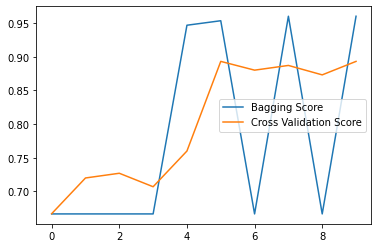

In [ ]:
plt.plot(bag_score, label='Bagging Score')
plt.plot(bag_val_score, label = 'Cross Validation Score')
plt.legend()
plt.show()